In [10]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

In [2]:
%cd ../../PGGCN/

/home/ali/GBNN/PGGCN


In [13]:
K = 5
PGCN_PG_hists = pickle.load(open('PGCN_PG_K5_fold_hists.pkl', 'rb'))
PGCN_PG_loss = np.array(pickle.load(open('PGCN_PG_K5_fold_test.pkl', 'rb')))
PGCN_DD_hists = pickle.load(open('PGCN_DD_K5_fold_hists.pkl', 'rb'))
PGCN_DD_loss = np.array(pickle.load(open('PGCN_DD_K5_fold_test.pkl', 'rb')))
PGCN_PG_single = pickle.load(open('PGCN_PG_single.pkl', 'rb'))
PGCN_DD_single = pickle.load(open('PGCN_DD_single.pkl', 'rb'))
PGNN_PG_hists = pickle.load(open('PGNN_PG_K5_hists.pkl', 'rb'))
PGNN_PG_loss = np.array(pickle.load(open('PGNN_PG_K5_loss.pkl', 'rb')))
PGNN_DD_hists = pickle.load(open('PGNN_DD_K5_hists.pkl', 'rb'))
PGNN_DD_loss = np.array(pickle.load(open('PGNN_DD_K5_loss.pkl', 'rb')))
PGNN_PG_single = pickle.load(open('PGNN_PG_single.pkl', 'rb'))
PGNN_DD_single = pickle.load(open('PGNN_DD_single.pkl', 'rb'))
Alles_hists = pickle.load(open('Alles_hists.pkl', 'rb'))
Alles_loss = np.array(pickle.load(open('Alles_loss.pkl', 'rb')))
Alles_single = pickle.load(open('../Notebooks/Entropy/JCIM_result/Alles_single.pkl', 'rb'))

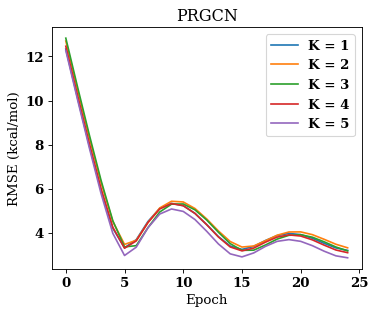

In [40]:
figure(figsize=(5, 4), dpi=80)
for i in range(K):
    plt.plot(PGCN_PG_hists[i][:25], label='K = %d' % (i + 1))
plt.xlabel('Epoch')
plt.ylabel('RMSE (kcal/mol)')
plt.title('PRGCN')
plt.legend()

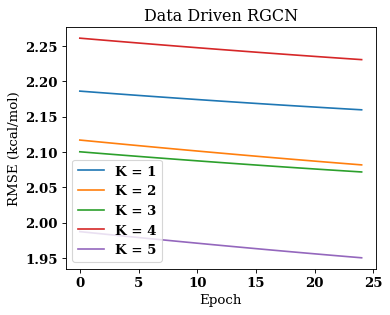

In [42]:
figure(figsize=(5, 4), dpi=80)
for i in range(K):
    plt.plot(PGCN_DD_hists[i][:25], label='K = %d' % (i + 1))
plt.xlabel('Epoch')
plt.ylabel('RMSE (kcal/mol)')
plt.title('Data Driven RGCN')
plt.legend()

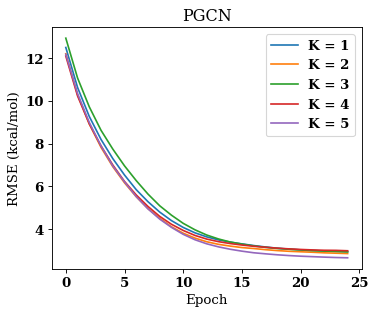

In [43]:
figure(figsize=(5, 4), dpi=80)
for i in range(K):
    plt.plot(PGNN_PG_hists[i][:25], label='K = %d' % (i + 1))
plt.xlabel('Epoch')
plt.ylabel('RMSE (kcal/mol)')
plt.title('PGCN')
plt.legend()

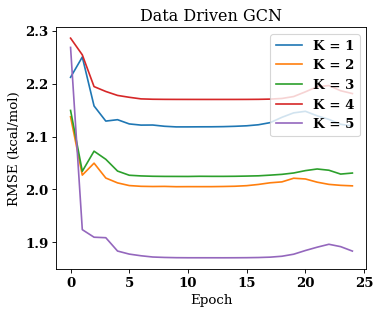

In [44]:
figure(figsize=(5, 4), dpi=80)
for i in range(K):
    plt.plot(PGNN_DD_hists[i][:25], label='K = %d' % (i + 1))
plt.xlabel('Epoch')
plt.ylabel('RMSE (kcal/mol)')
plt.title('Data Driven GCN')
plt.legend()

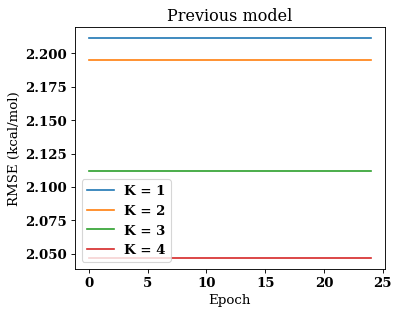

In [28]:
figure(figsize=(5, 4), dpi=80)
for i in range(4):
    plt.plot(Alles_hists[i][:25], label='K = %d' % (i + 1))
plt.xlabel('Epoch')
plt.ylabel('RMSE (kcal/mol)')
plt.title('Previous model')
plt.legend()

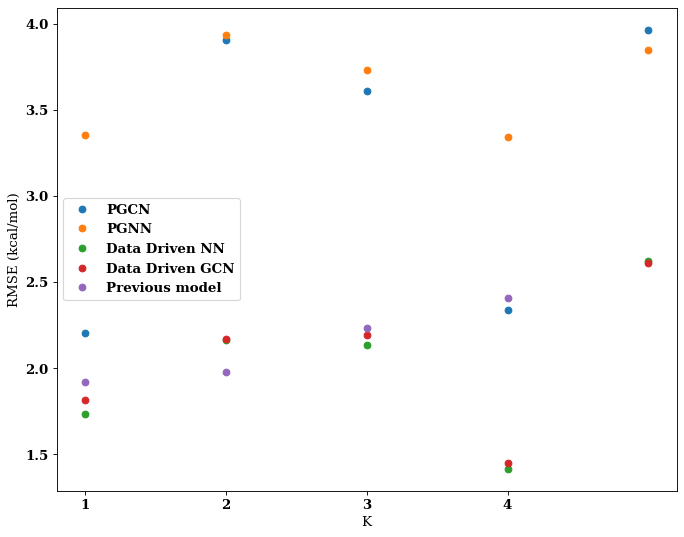

In [29]:
figure(figsize=(10, 8), dpi=80)
plt.plot(PGCN_PG_loss, 'o', label = 'PGCN')
plt.plot(PGNN_PG_loss, 'o', label = 'PGNN')
plt.plot(PGNN_DD_loss, 'o', label = 'Data Driven NN')
plt.plot(PGCN_DD_loss, 'o', label = 'Data Driven GCN')
plt.plot(Alles_loss, 'o', label = 'Previous model')
plt.xlabel('K')
plt.ylabel('RMSE (kcal/mol)')
plt.xticks([i for i in range(4)], [i + 1 for i in range(4)])
plt.legend()

In [10]:
len(PGNN_DD_single[0])

20

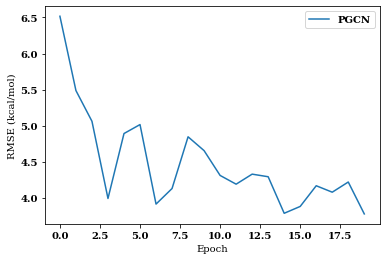

In [14]:
plt.plot(PGCN_PG_single[0][:20], label='PGCN')
# plt.plot(PGCN_DD_single[0][30:], label='Without PP')
plt.xlabel('Epoch')
plt.ylabel('RMSE (kcal/mol)')
plt.legend()

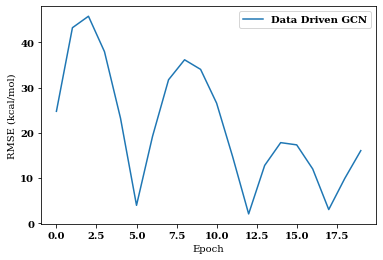

In [26]:
plt.plot(PGCN_DD_single[0][3:23], label='Data Driven GCN')
plt.xlabel('Epoch')
plt.ylabel('RMSE (kcal/mol)')
plt.legend()

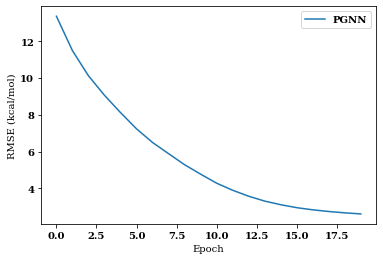

In [16]:
plt.plot(PGNN_PG_single[0][:20], label='PGNN')
# plt.plot(PGCN_DD_single[0][30:], label='Without PP')
plt.xlabel('Epoch')
plt.ylabel('RMSE (kcal/mol)')
plt.legend()

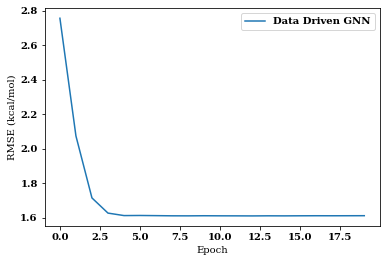

In [18]:
plt.plot(PGNN_DD_single[0][:20], label='Data Driven GNN')
# plt.plot(PGCN_DD_single[0][30:], label='Without PP')
plt.xlabel('Epoch')
plt.ylabel('RMSE (kcal/mol)')
plt.legend()

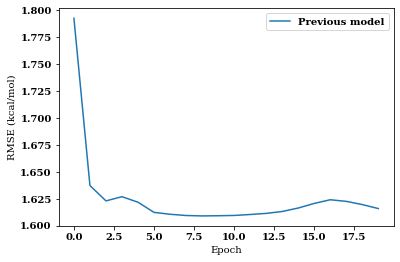

In [27]:
plt.plot(Alles_single[0][:20], label='Previous model')
# plt.plot(PGCN_DD_single[0][30:], label='Without PP')
plt.xlabel('Epoch')
plt.ylabel('RMSE (kcal/mol)')
plt.legend()

# prediction comparison

In [7]:
PGCN_PG_pred = pickle.load(open('PGCN_PG_K5_fold_train_pred.pkl', 'rb'))
PGCN_DD_pred = pickle.load(open('PGCN_DD_K5_fold_train_pred.pkl', 'rb'))
PGNN_PG_pred = pickle.load(open('PGNN_PG_K5_predicts_train.pkl', 'rb'))
PGNN_DD_pred = pickle.load(open('PGNN_DD_K5_predicts_train.pkl', 'rb'))
y = pickle.load(open('y_folds_5.pkl', 'rb'))

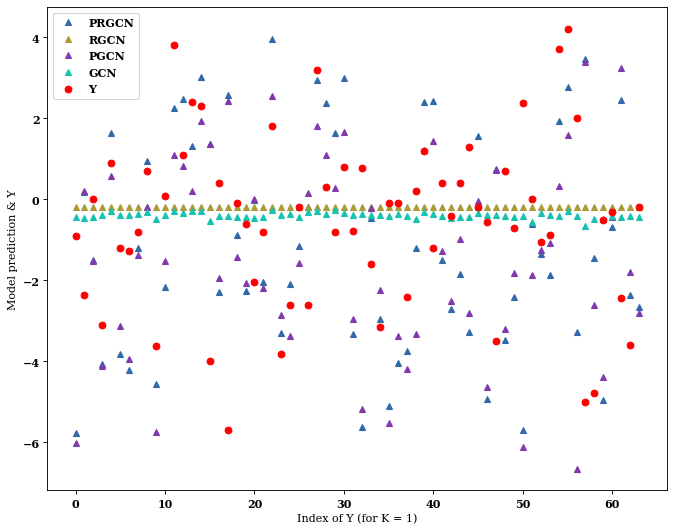

In [29]:
figure(figsize=(10, 8), dpi=80)
y_curr = np.concatenate(np.array([y[i] for i in range(K) if i != 0]), 0)
plt.plot(PGCN_PG_pred[0], '^', label='PRGCN', color='#3269a8')
plt.plot(PGCN_DD_pred[0], '^', label='RGCN', color='#ad9a39')
plt.plot(PGNN_PG_pred[0], '^', label='PGCN', color='#8139ad')
plt.plot(PGNN_DD_pred[0], '^', label='GCN', color='#17c2b1')
plt.plot(y_curr, 'ro', label = 'Y', linewidth=4)
plt.xlabel('Index of Y (for K = 1)')
plt.ylabel('Model prediction & Y')
plt.legend()

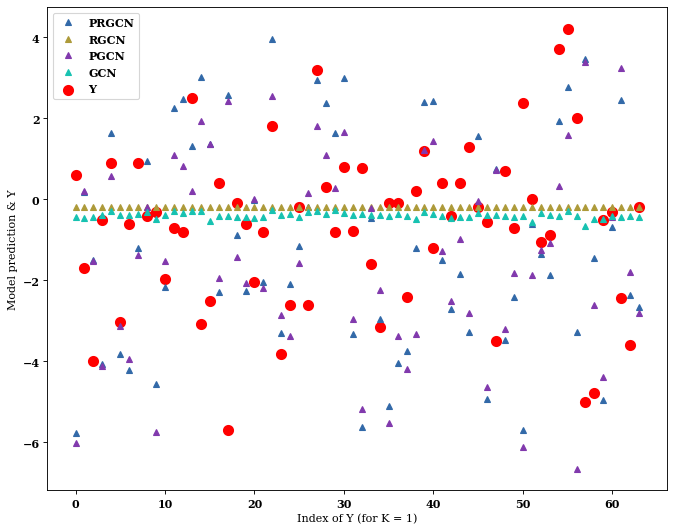

In [43]:
figure(figsize=(10, 8), dpi=80)
y_curr = np.concatenate(np.array([y[i] for i in range(K) if i != 1]), 0)
x_axis = np.arange(len(y_curr))
plt.plot(PGCN_PG_pred[0], '^', label='PRGCN', color='#3269a8')
plt.plot(PGCN_DD_pred[0], '^', label='RGCN', color='#ad9a39')
plt.plot(PGNN_PG_pred[0], '^', label='PGCN', color='#8139ad')
plt.plot(PGNN_DD_pred[0], '^', label='GCN', color='#17c2b1')
plt.scatter(x_axis, y_curr, marker='o', label = 'Y', linewidths=4, color='red')
plt.xlabel('Index of Y (for K = 1)')
plt.ylabel('Model prediction & Y')
plt.legend()

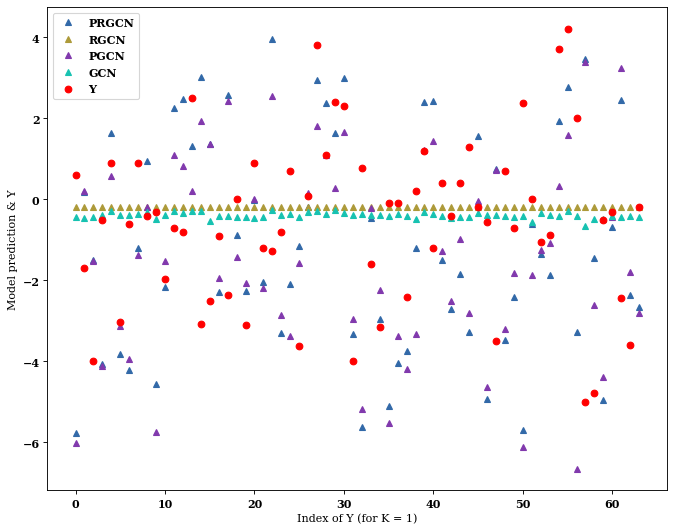

In [31]:
figure(figsize=(10, 8), dpi=80)
y_curr = np.concatenate(np.array([y[i] for i in range(K) if i != 2]), 0)
plt.plot(PGCN_PG_pred[0], '^', label='PRGCN', color='#3269a8')
plt.plot(PGCN_DD_pred[0], '^', label='RGCN', color='#ad9a39')
plt.plot(PGNN_PG_pred[0], '^', label='PGCN', color='#8139ad')
plt.plot(PGNN_DD_pred[0], '^', label='GCN', color='#17c2b1')
plt.plot(y_curr, 'ro', label = 'Y', linewidth=4)
plt.xlabel('Index of Y (for K = 1)')
plt.ylabel('Model prediction & Y')
plt.legend()

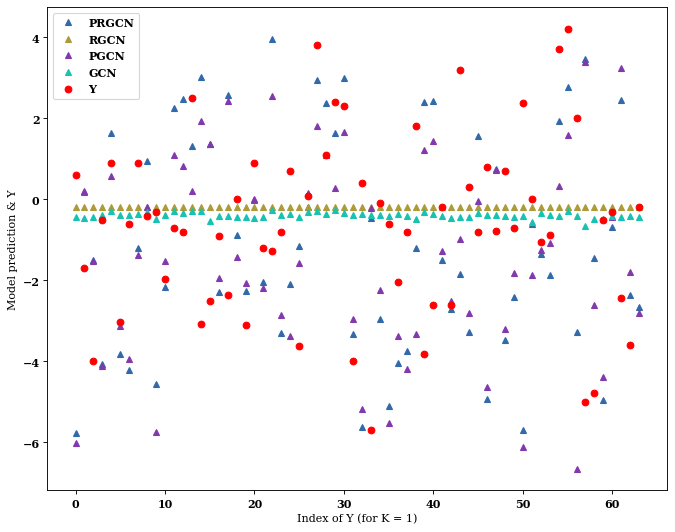

In [32]:
figure(figsize=(10, 8), dpi=80)
y_curr = np.concatenate(np.array([y[i] for i in range(K) if i != 3]), 0)
plt.plot(PGCN_PG_pred[0], '^', label='PRGCN', color='#3269a8')
plt.plot(PGCN_DD_pred[0], '^', label='RGCN', color='#ad9a39')
plt.plot(PGNN_PG_pred[0], '^', label='PGCN', color='#8139ad')
plt.plot(PGNN_DD_pred[0], '^', label='GCN', color='#17c2b1')
plt.plot(y_curr, 'ro', label = 'Y', linewidth=4)
plt.xlabel('Index of Y (for K = 1)')
plt.ylabel('Model prediction & Y')
plt.legend()

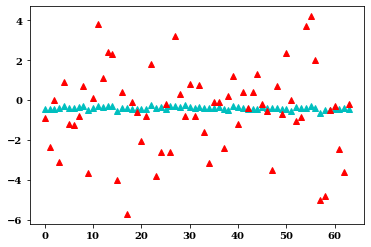

In [18]:
y_curr = np.concatenate(np.array([y[i] for i in range(K) if i != 0]), 0)
plt.plot(PGNN_DD_pred[0], 'c^')
plt.plot(y_curr, 'r^')